## Task: To calculate Inertia for the given dataset from scratch

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [9]:
data = pd.read_csv(r"C:\Users\mdine\Downloads\Module_10_assignment\Exercise\clustering.csv")
data.head()

,label,x,y
0,2,94,81
1,1,1,12
2,2,62,80
3,2,92,64
4,2,83,64


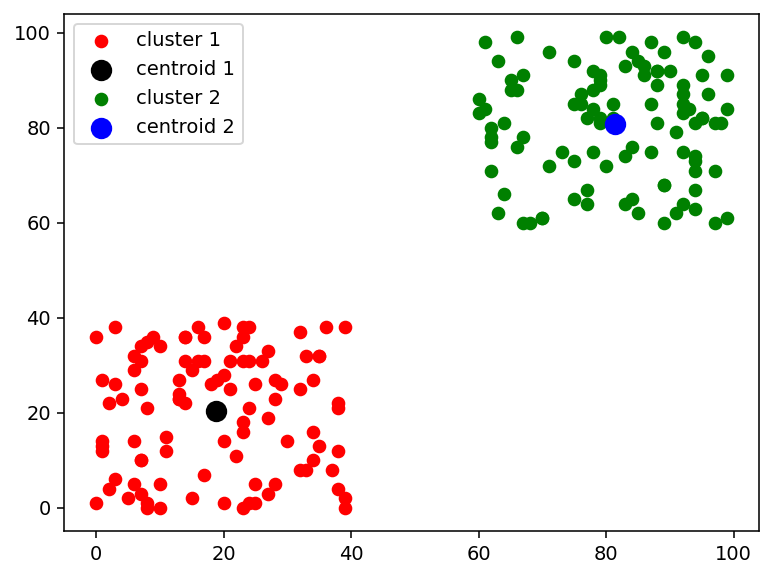

In [3]:
#plotting clusters
plt.figure(dpi=140)

#cluster1 and its centroid
cluster1 = data[data['label'] == 1]
plt.scatter(cluster1['x'],cluster1['y'], color='red', label ='cluster 1')
plt.scatter(cluster1['x'].mean(), cluster1['y'].mean(), s=100, color='black', label='centroid 1')

#cluster2 and its centroid
cluster2 = data[data['label']==2]
plt.scatter(cluster2['x'],cluster2['y'], color='green', label ='cluster 2')
plt.scatter(cluster2['x'].mean(),cluster2['y'].mean() ,s=100, label = 'centroid 2', color = 'blue')

plt.legend()
plt.show()

Calculating Inertia of clusters

**Steps to Calculate Inertia:**
 
 1.   define a function to calculate eucledian distance

 2.   calculate distance of every point in cluster 1 from it's centroid

 3.   calculate distance of every point in cluster 2 from it's centroid
 
 4.   calculate Inertia

In [4]:
import numpy as np

def euclid(pt1, pt2):
    '''
    pt1, pt2: two points/coordinates to calculate distance between, must be of the same dimension
    returns the distance between the two points
    '''
    # Check if pt1 and pt2 have the same dimension
    if len(pt1) != len(pt2):
        raise ValueError("Points must have the same dimension")

    # Calculate the squared Euclidean distance between the two points
    squared_distance = np.sum((np.array(pt1) - np.array(pt2))**2)
    
    # Take the square root to get the Euclidean distance
    distance = np.sqrt(squared_distance)
    
    return distance


In [5]:
### testing function
print(euclid([5,5],[10,10]))
print(euclid([1,3],[10,12]))

7.0710678118654755
12.727922061357855


#### Expected outcome: 

<img src="images/image2.png" >

In [6]:
def euclid(pt1, pt2):
    '''
    pt1, pt2: two points/coordinates to calculate distance between, must be of the same dimension
    returns the distance between the two points
    '''
    # Check if pt1 and pt2 have the same dimension
    if len(pt1) != len(pt2):
        raise ValueError("Points must have the same dimension")

    # Calculate the squared Euclidean distance between the two points
    squared_distance = np.sum((np.array(pt1) - np.array(pt2))**2)
    
    # Take the square root to get the Euclidean distance
    distance = np.sqrt(squared_distance)
    
    return distance


In [14]:
# Define the Inertia function
def Inertia(data):
    '''
    Given the complete data points with cluster targets (labels), calculate Inertia.
    
    Parameters:
    data: The input data with cluster labels.
    
    Returns:
    inertia: The Inertia value.
    '''
    inertia = 0
    
    # Identify the unique cluster labels
    unique_clusters = np.unique(data['cluster_label'])
    
    for cluster_label in unique_clusters:
        # Select data points belonging to the current cluster
        cluster_data = data[data['cluster_label'] == cluster_label]
        
        # Calculate the centroid of the current cluster
        centroid = cluster_data.drop(columns=['cluster_label']).mean()
        
        # Calculate the sum of squared distances within the cluster
        sum_squared_distances = 0
        for index, row in cluster_data.iterrows():
            point = row.drop(labels=['cluster_label'])
            sum_squared_distances += euclid(point, centroid) ** 2
        
        # Add the sum of squared distances to the overall inertia
        inertia += sum_squared_distances
    
    return inertia

# Now, let's calculate the Inertia for your data (replace 'data' with your actual data)
data = pd.DataFrame({'X1': [1, 2, 3, 4, 5], 'X2': [2, 3, 4, 5, 6], 'cluster_label': [0, 0, 1, 1, 1]})
inertia_value = Inertia(data)

# Print the Inertia value
print("Inertia:", inertia_value)

Inertia: 5.000000000000001


**Expected Outcome**

<img src="images/image3.png">